In [1]:
# imports
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import numpy as np
import spacy
import os
import pandas as pd
import collections
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
### Creating DataFrame

idir = "/home/akhilesh/civicdatalab/samantar_parsers/data/txts/"
df = pd.DataFrame()
all_data = []
for filename in os.listdir(idir):
    if filename.endswith('.txt'):
        with open(idir + filename, 'r') as f:
            data = f.readlines()
        stripped_data = list(map(lambda x: x.strip(), data))
        clean_data = ' '.join(stripped_data)
        corr = (filename.split(".")[0], clean_data)
        all_data.append(corr)

df = pd.DataFrame(all_data)
df.columns = ['year', 'content']

In [4]:
df.head()

,year,content
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...


In [6]:
df['tokenised'] = df.content.apply(lambda x: [x.text for x in nlp.tokenizer(x)])

In [7]:
from measures.freq_based import sichel_s
from measures.freq_based import michea_m
from measures.freq_based import honore_h
from measures.freq_based import entropy
from measures.freq_based import yule_k
from measures.freq_based import simpson_d
from measures.freq_based import herdan_vm
from measures.freq_based import hdd

In [8]:
measures = dict(
    sichel_s=sichel_s,
    michea_m=michea_m,
    honore_h=honore_h,
    entropy=entropy,
    yule_k=yule_k,
    simpson_d=simpson_d,
    herdan_vm=herdan_vm,
    hdd=hdd
)

In [9]:
def get_freq_spectrum(tokens: List[str]) -> Dict[int, int]:
    freq_list = collections.Counter(tokens)
    freq_spectrum = dict(collections.Counter(freq_list.values()))
    return freq_spectrum

In [10]:
window_size = 100
def get_measure(tokens: List[str], measure: str) -> np.float64:
    func = measures[measure]
    total_measure = []
    if tokens:
    #     freq_spectrum = get_freq_spectrum(tokens)
    #     vocab_size = len(set(tokens))
    #     total_measure.append(func(vocab_size, freq_spectrum))
        for i in range(int(len(tokens) / window_size)):
            chunk = tokens[i * window_size : (i * window_size) + window_size]
            freq_spectrum = get_freq_spectrum(tokens)
            vocab_size = len(set(tokens))
            txt_len = len(tokens)
            result = func(vocab_size, freq_spectrum)
            total_measure.append(result)
        return np.mean(total_measure)
    return None

In [11]:
df['sichel_s'] = df['tokenised'].apply(lambda x: get_measure(x, 'sichel_s'))

In [27]:
df.to_csv('sichel_s.csv')

In [12]:
window_size = 100
def get_other_measure(tokens: List[str], measure: str) -> np.float64:
    func = measures[measure]
    total_measure = []
#     freq_spectrum = get_freq_spectrum(tokens)
#     vocab_size = len(set(tokens))
#     total_measure.append(func(vocab_size, freq_spectrum))
    for i in range(int(len(tokens) / window_size)):
        chunk = tokens[i * window_size : (i * window_size) + window_size]
        freq_spectrum = get_freq_spectrum(tokens)
#         vocab_size = len(set(tokens))
        txt_len = len(tokens)
        result = func(txt_len, freq_spectrum)
        total_measure.append(result)
    return np.mean(total_measure)

In [13]:
df['entropy'] = df['tokenised'].apply(lambda x: get_measure(x, 'entropy'))

In [14]:
df['yule_k'] = df['tokenised'].apply(lambda x: get_measure(x, 'yule_k'))

In [15]:
df['simpson_d'] = df['tokenised'].apply(lambda x: get_measure(x, 'simpson_d'))

In [16]:
df['hdd'] = df['tokenised'].apply(lambda x: get_measure(x, 'hdd'))

In [33]:
df.to_csv('most_of_freq_measures.csv')

In [17]:
def get_all_other_measure(tokens: List[str], measure: str) -> np.float64:
    func = measures[measure]
    total_measure = []
#     freq_spectrum = get_freq_spectrum(tokens)
#     vocab_size = len(set(tokens))
#     total_measure.append(func(vocab_size, freq_spectrum))
    for i in range(int(len(tokens) / window_size)):
        chunk = tokens[i * window_size : (i * window_size) + window_size]
        freq_spectrum = get_freq_spectrum(tokens)
        vocab_size = len(set(tokens))
        txt_len = len(tokens)
        result = func(txt_len, vocab_size, freq_spectrum)
        total_measure.append(result)
    return np.mean(total_measure)

In [18]:
df['honore_h'] = df['tokenised'].apply(lambda x: get_all_other_measure(x, 'honore_h'))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [19]:
df['herdan_vm'] = df['tokenised'].apply(lambda x: get_all_other_measure(x, 'herdan_vm'))

In [20]:
df.to_csv('all_freq_measures.csv')

In [21]:
df.head()

,year,content,tokenised,sichel_s,entropy,yule_k,simpson_d,hdd,honore_h,herdan_vm
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",0.173623,22.511363,9330.056725,0.931271,0.218231,2057.580112,0.164162
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",0.190249,23.569275,10695.466424,1.068091,0.219024,2077.499467,0.170180
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",0.155776,20.669132,11859.393825,1.184112,0.208428,2189.441205,0.190398
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",0.172589,18.596075,196067.145346,19.610119,0.223868,2213.915152,0.447905
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",0.176267,17.793591,191848.702280,19.188884,0.226490,2148.597128,0.449452


In [22]:
new_df = df.copy()

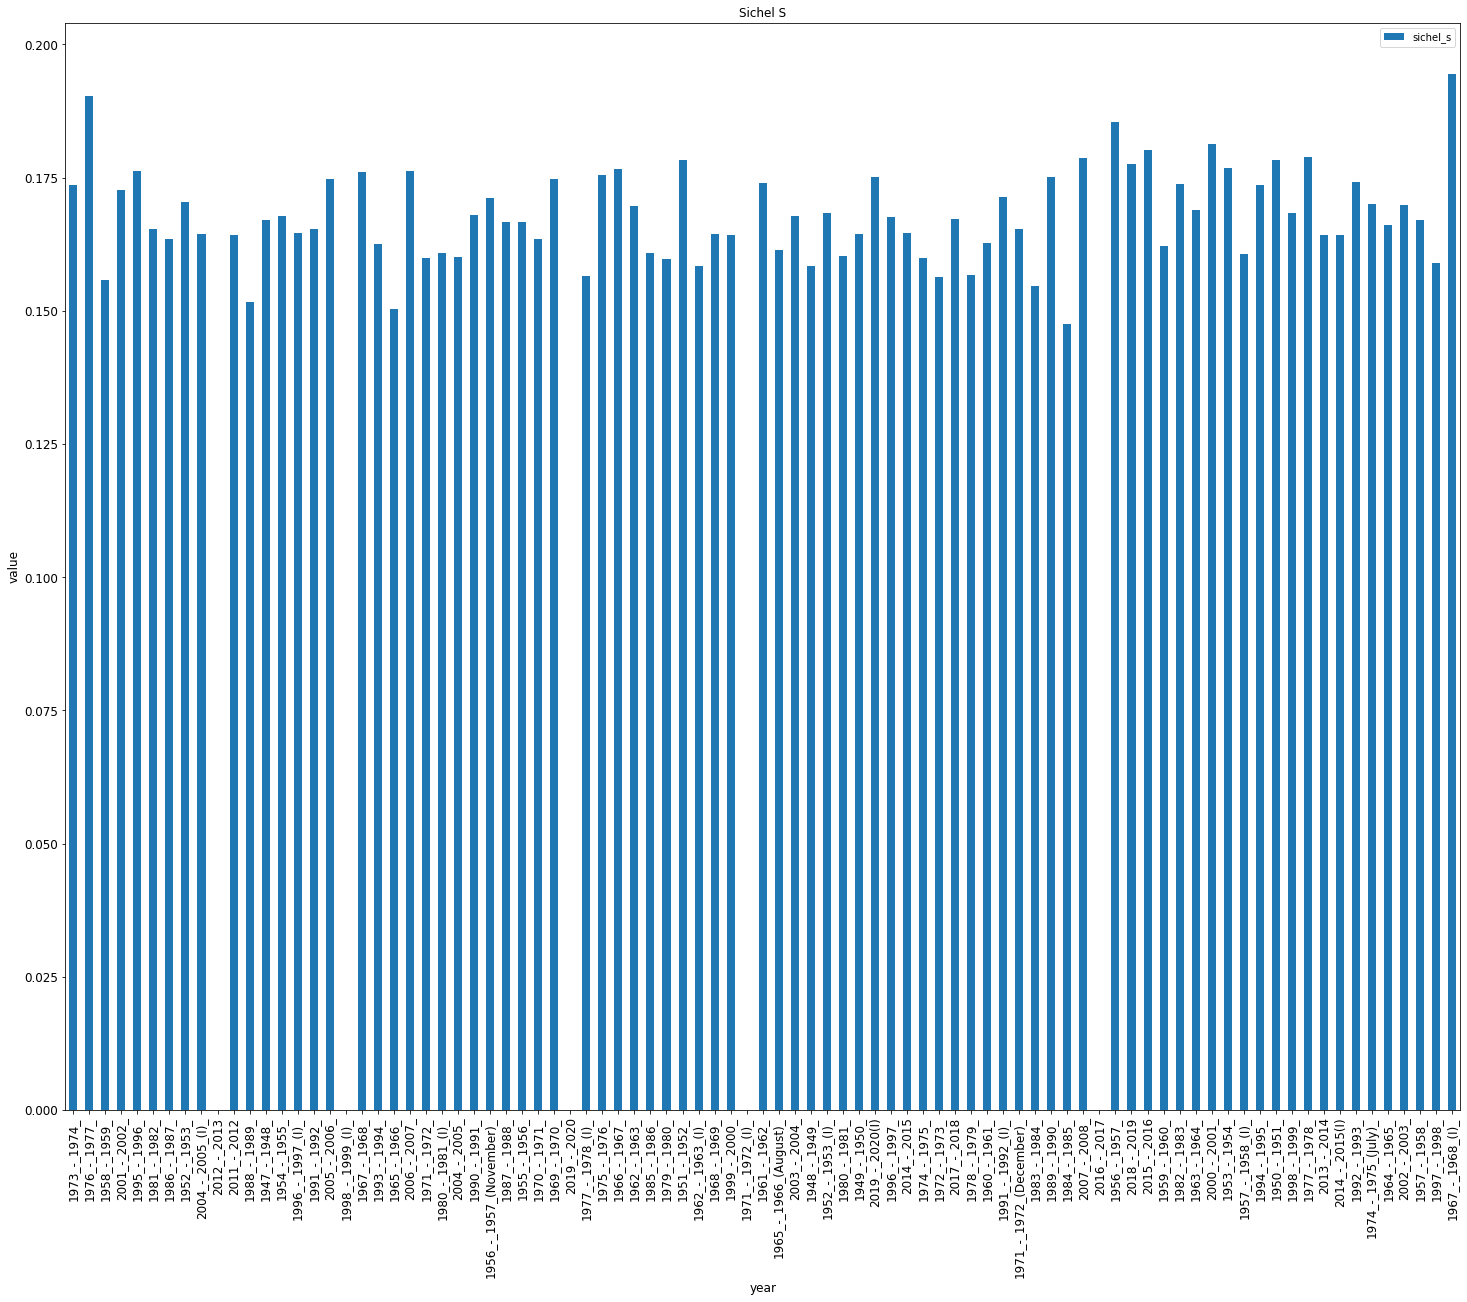

In [23]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='sichel_s', kind='bar', title ="Sichel S", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

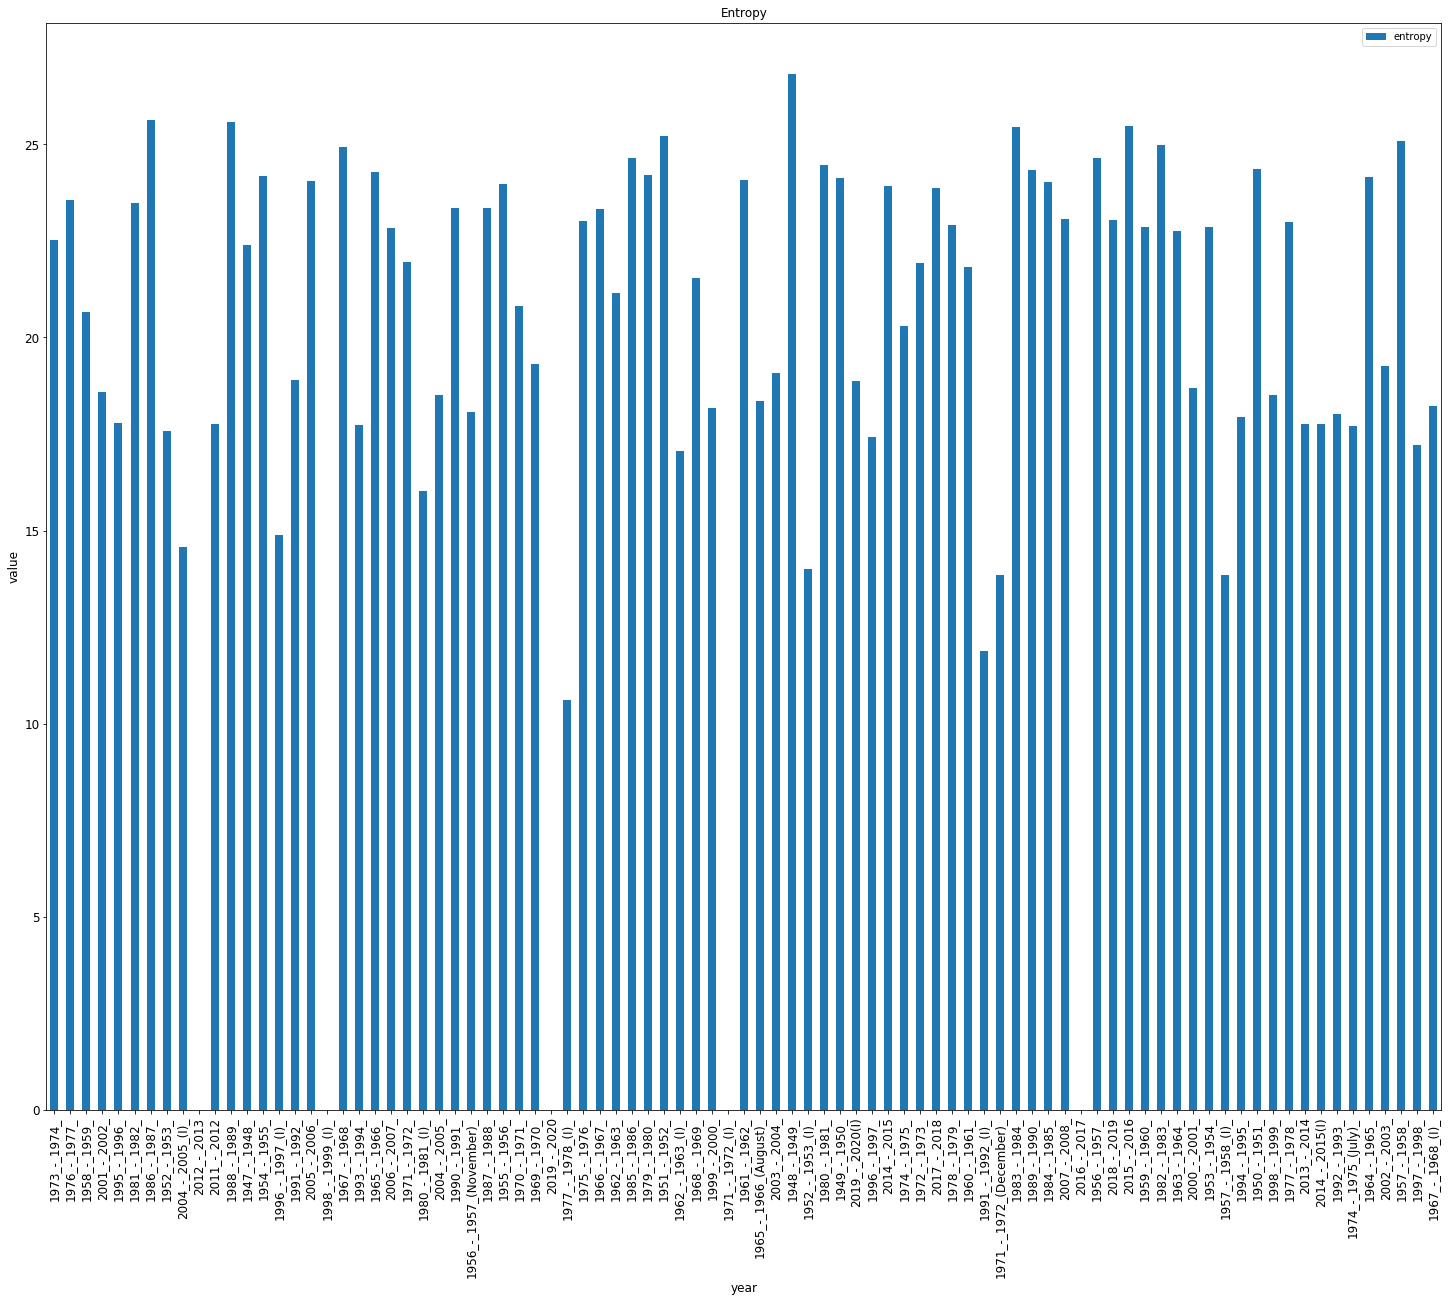

In [24]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='entropy', kind='bar', title ="Entropy", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

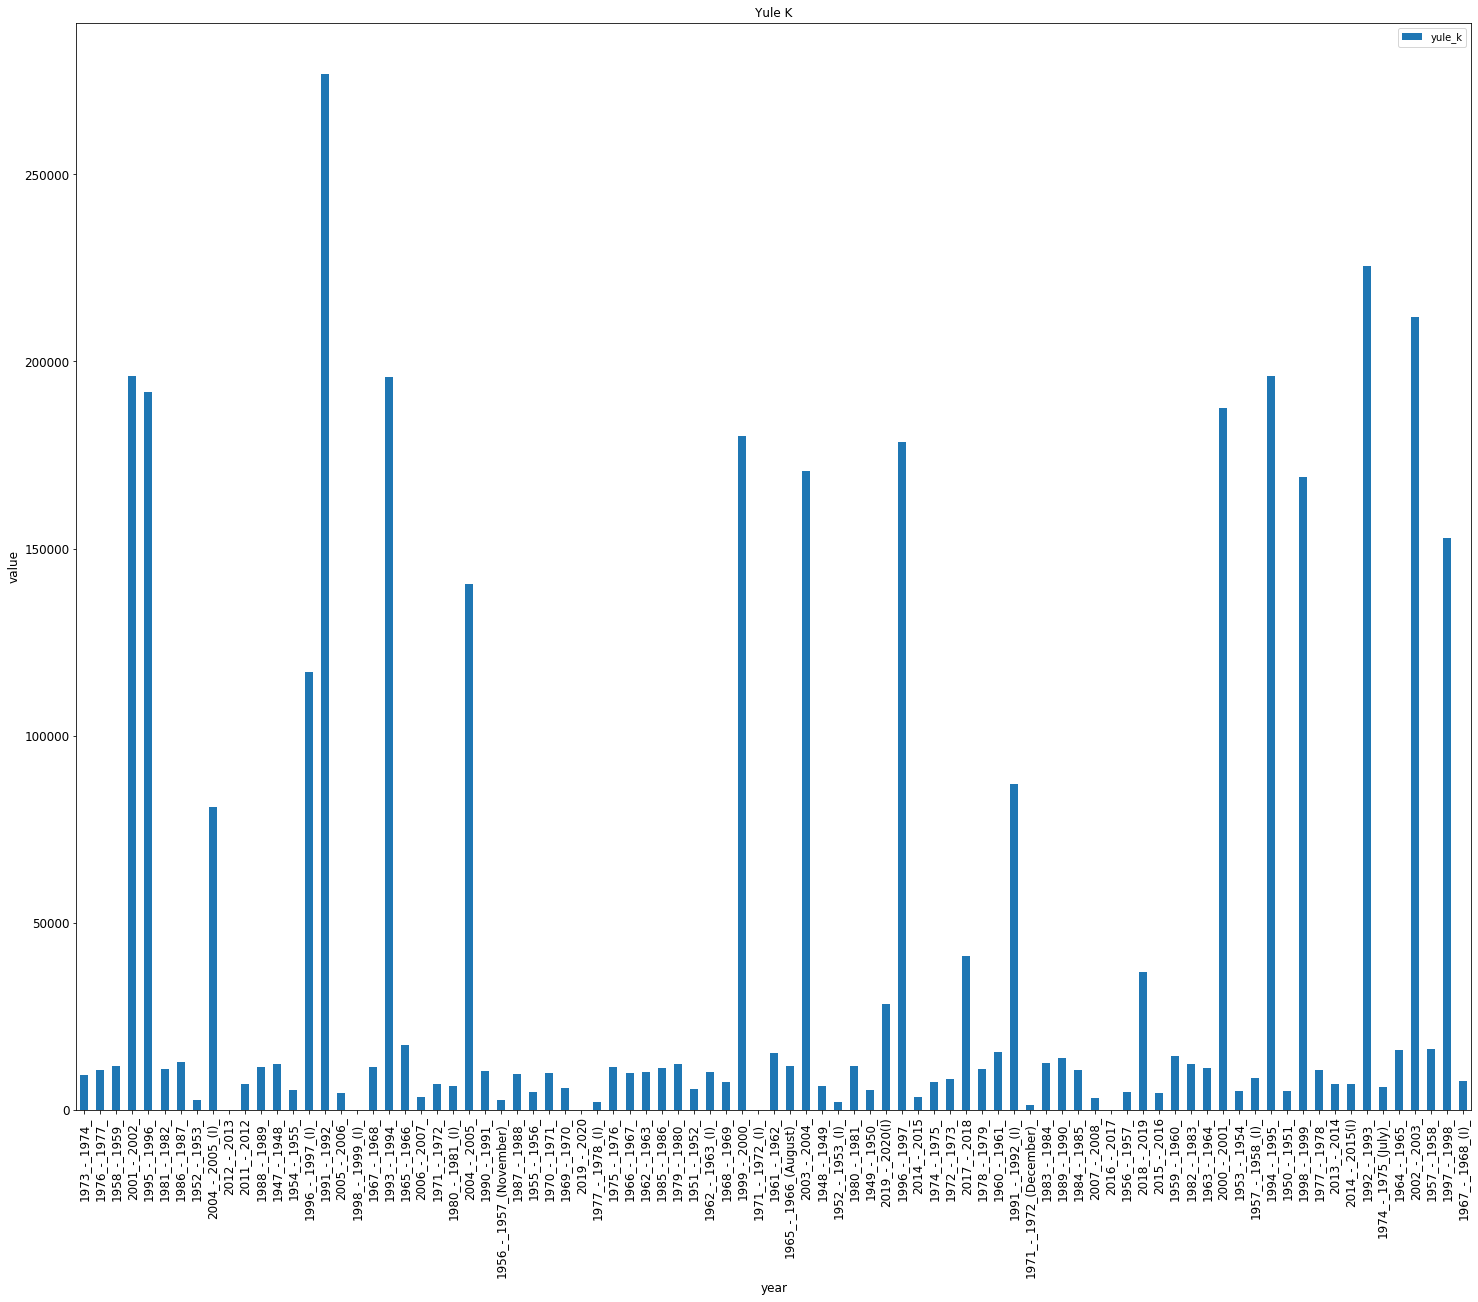

In [25]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='yule_k', kind='bar', title ="Yule K", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

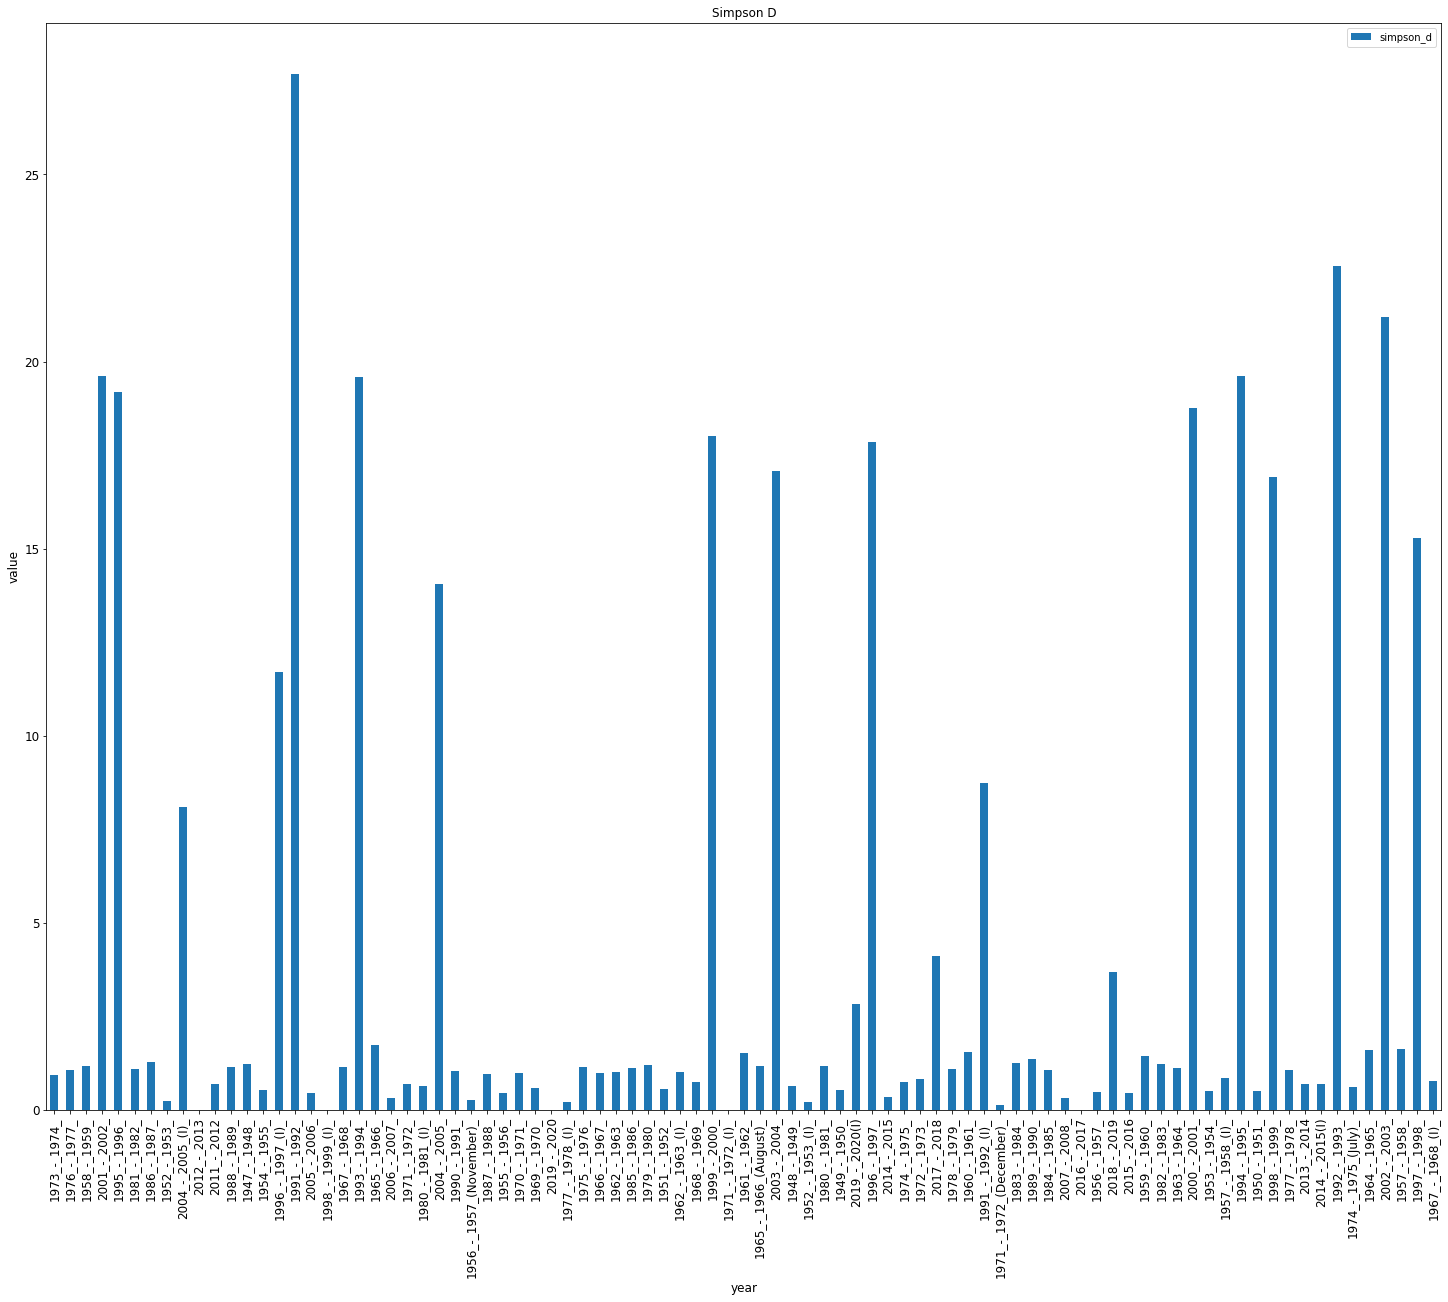

In [26]:
import matplotlib.pyplot as plt
ax = new_df.plot(x='year', y='simpson_d', kind='bar', title ="Simpson D", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

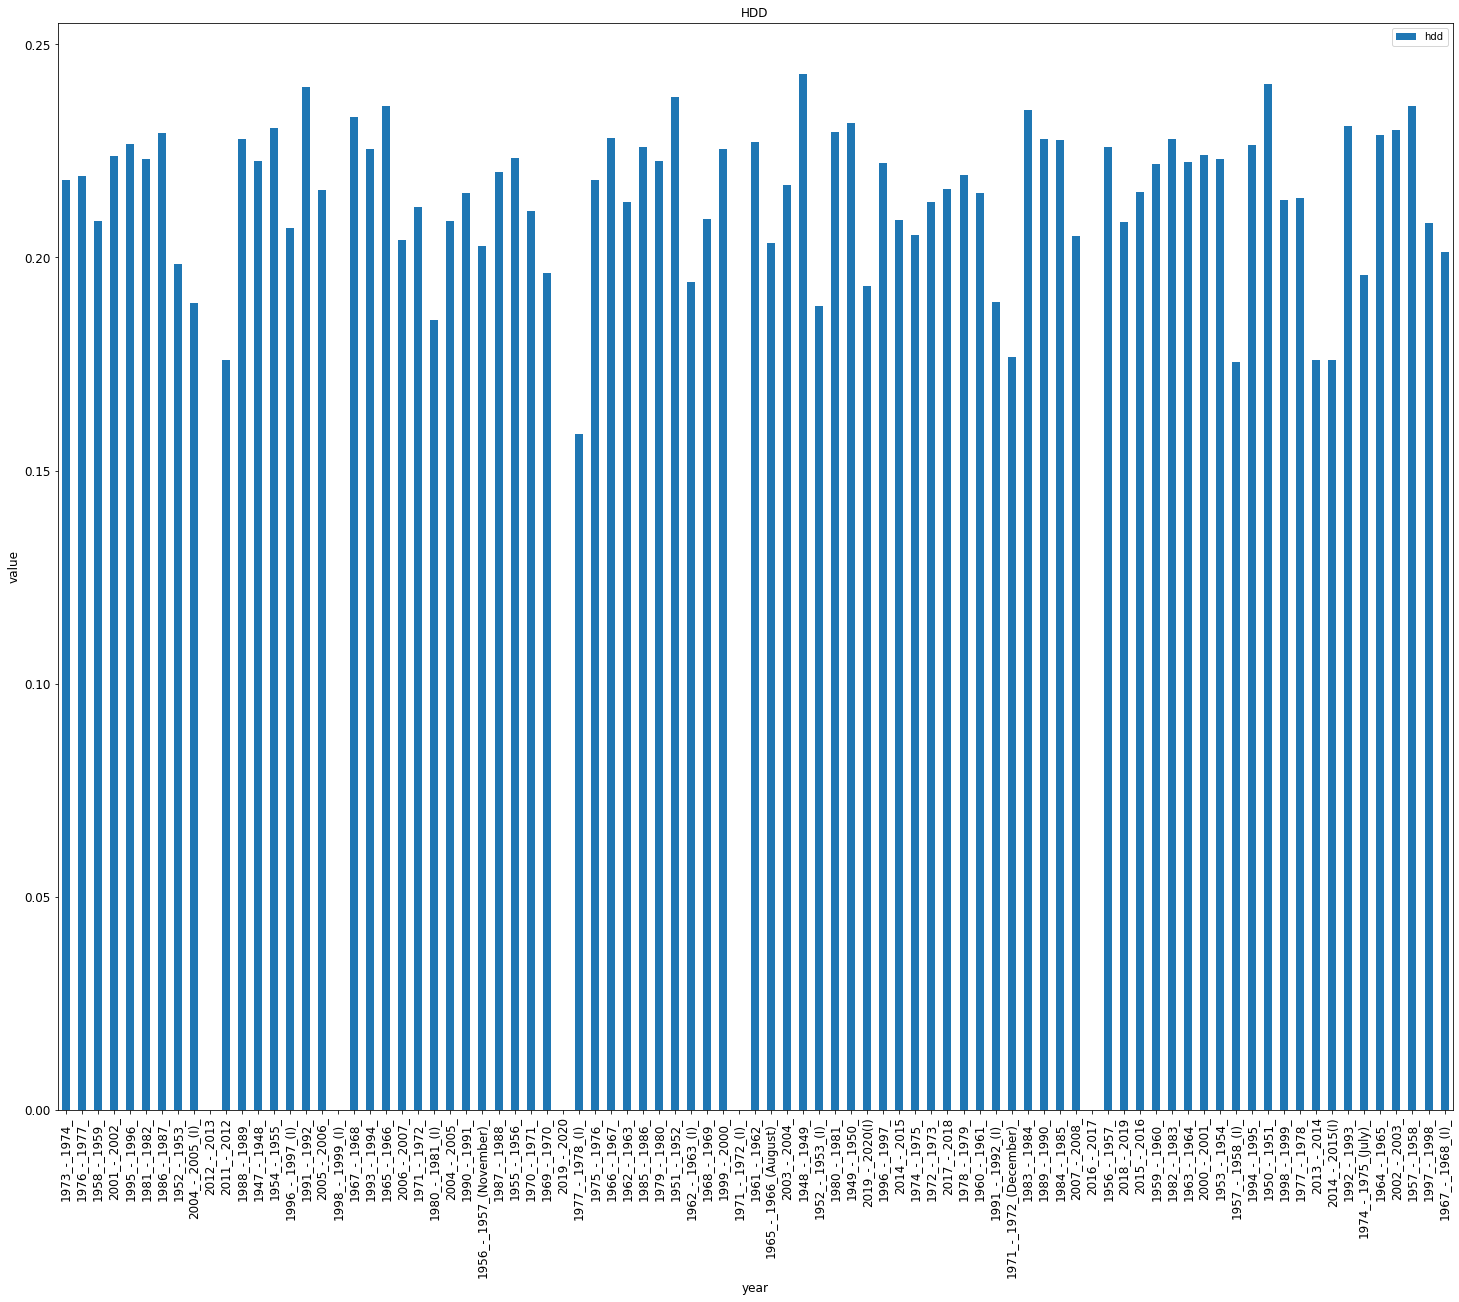

In [27]:
ax = new_df.plot(x='year', y='hdd', kind='bar', title ="HDD", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

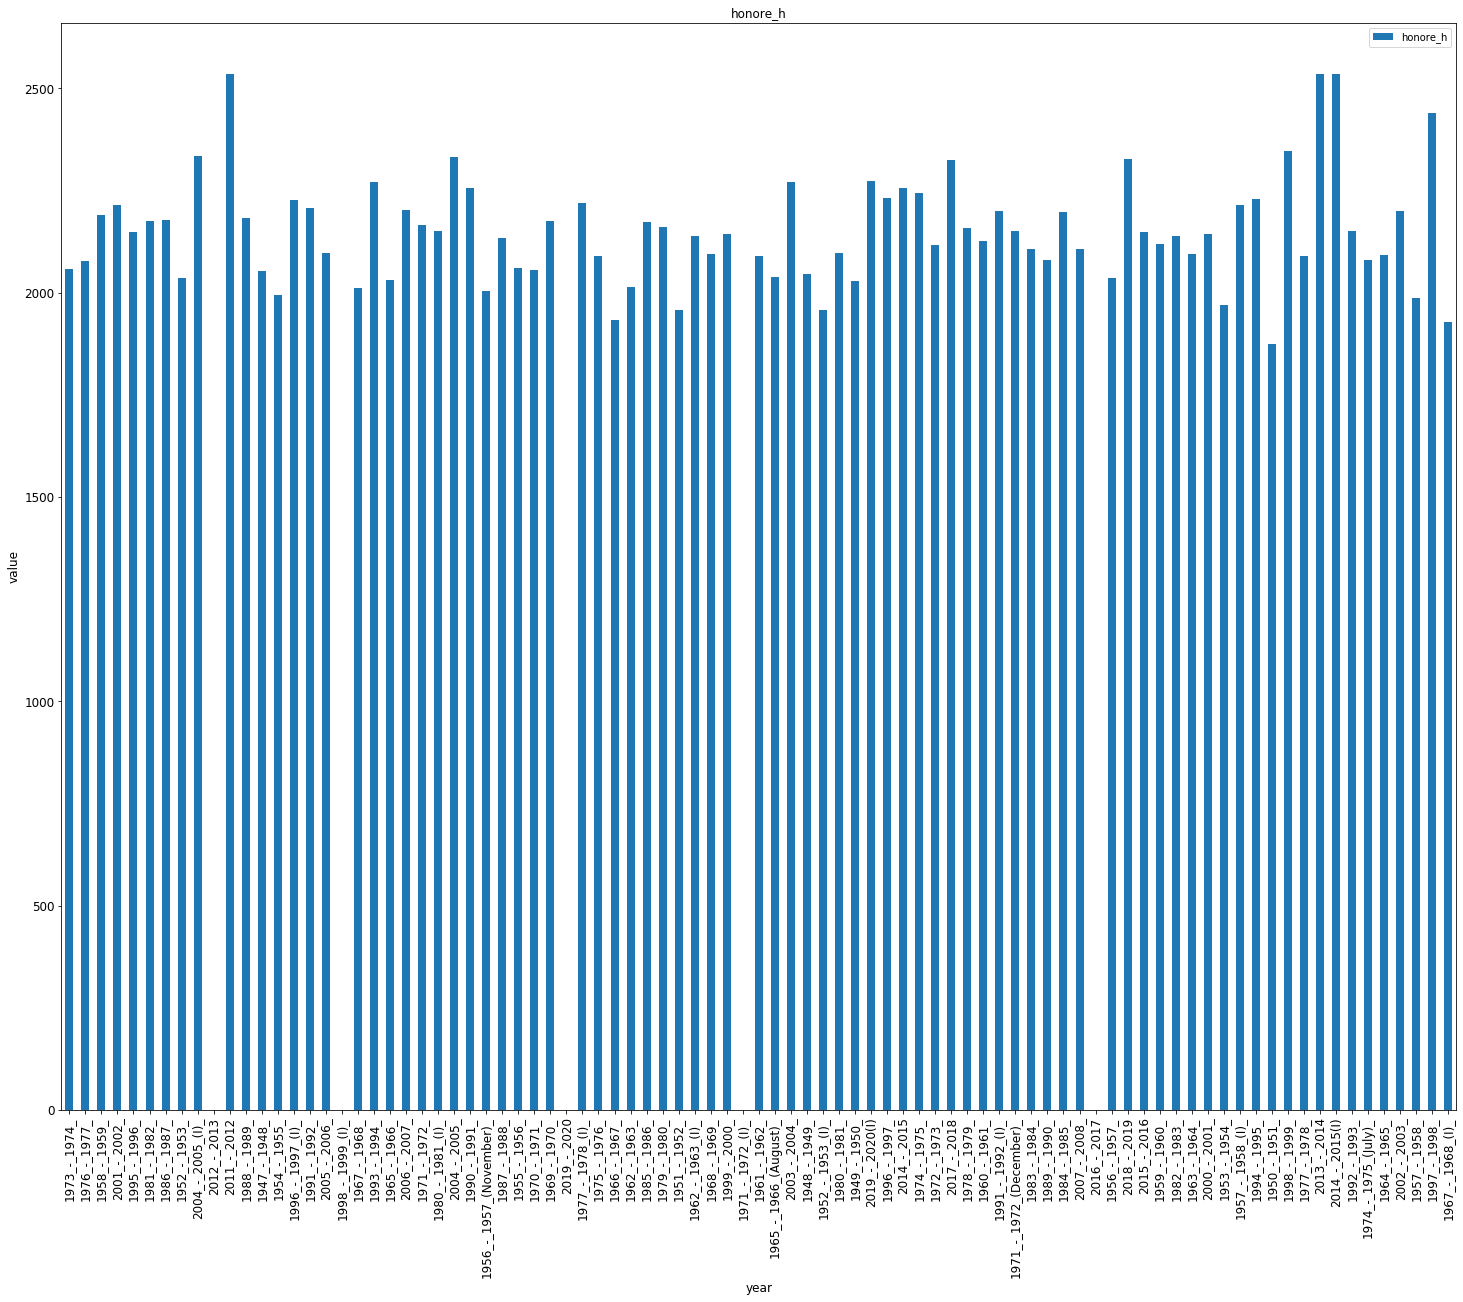

In [28]:
ax = new_df.plot(x='year', y='honore_h', kind='bar', title ="honore_h", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

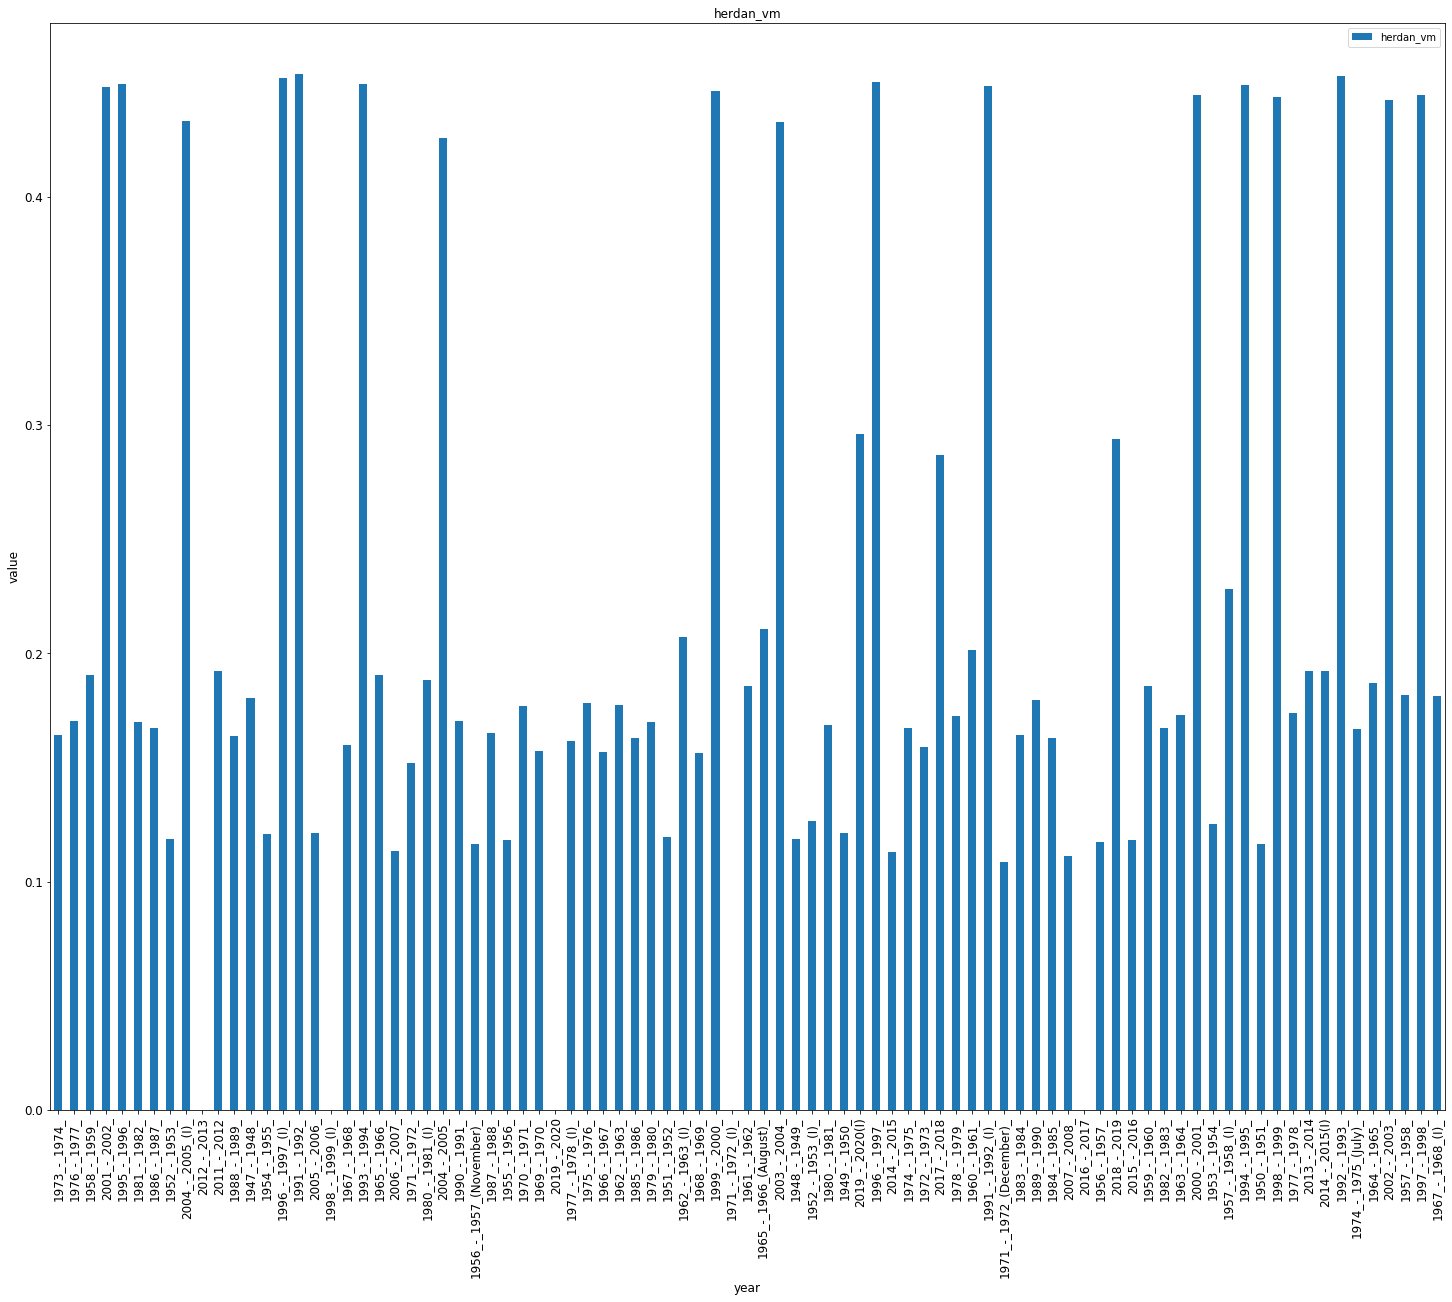

In [29]:
ax = new_df.plot(x='year', y='herdan_vm', kind='bar', title ="herdan_vm", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()